In [15]:
#Level 1

In [59]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [60]:
#Reading the dataset
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [61]:
#Getting more information regarding the dataset
df.describe()

,Restaurant ID,Country Code,Longitude,Latitude,Average Cost for two,Price range,Aggregate rating,Votes
count,9.551000e+03,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000,9551.000000
mean,9.051128e+06,18.365616,64.126574,25.854381,1199.210763,1.804837,2.666370,156.909748
std,8.791521e+06,56.750546,41.467058,11.007935,16121.183073,0.905609,1.516378,430.169145
min,5.300000e+01,1.000000,-157.948486,-41.330428,0.000000,1.000000,0.000000,0.000000
25%,3.019625e+05,1.000000,77.081343,28.478713,250.000000,1.000000,2.500000,5.000000
50%,6.004089e+06,1.000000,77.191964,28.570469,400.000000,2.000000,3.200000,31.000000
75%,1.835229e+07,1.000000,77.282006,28.642758,700.000000,2.000000,3.700000,131.000000
max,1.850065e+07,216.000000,174.832089,55.976980,800000.000000,4.000000,4.900000,10934.000000


In [62]:
#Checking for null values
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [63]:
#Task 1 :- Top Cuisines
#Determine the top three most common cuisines in the dataset.

#Calculate the percentage of restaurants that serve each of the top cuisines.

In [64]:
#Determine the top three most common cuisines in the dataset.
df["Cuisines"]

0             French, Japanese, Desserts
1                               Japanese
2       Seafood, Asian, Filipino, Indian
3                        Japanese, Sushi
4                       Japanese, Korean
                      ...               
9546                             Turkish
9547     World Cuisine, Patisserie, Cafe
9548              Italian, World Cuisine
9549                     Restaurant Cafe
9550                                Cafe
Name: Cuisines, Length: 9551, dtype: object

In [65]:
#There are 9 rows having null values for the column Cuisines

# Dropping rows with missing values in 'Cuisines' column
df = df.dropna(subset=['Cuisines'])

# Splitting the values in the 'Cuisines' column and creating a list of all cuisines
all_cuisines = []
for cuisines in df['Cuisines']:
    all_cuisines.extend(cuisines.split(','))

# Counting the occurrences of each cuisine
cuisine_counts = pd.Series(all_cuisines).value_counts()

# Getting the top 3 most common cuisines
top_3_cuisines = cuisine_counts.head(3)
print("Top 3 cuisines are:")
print(top_3_cuisines)

Top 3 cuisines are:
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64


In [66]:
#Calculate the percentage of restaurants that serve each of the top cuisines.

# Calculating total number of restaurants
total_restaurants = len(df)

# Creating a dictionary to store the count of each cuisine in the top 3
cuisine_counts_top_3 = {}

# Counting the number of restaurants serving each cuisine in the top 3
for cuisine in top_3_cuisines.index:
    num_restaurants_with_cuisine = df[df['Cuisines'].str.contains(cuisine)].shape[0]
    cuisine_counts_top_3[cuisine] = num_restaurants_with_cuisine

# Calculating the percentage of restaurants serving each cuisine in the top 3
percentages_top_3 = {}
for cuisine, count in cuisine_counts_top_3.items():
    percentage = (count / total_restaurants) * 100
    percentages_top_3[cuisine] = percentage

print("Percentage of restaurants serving each of the top cuisines:")
for cuisine, percentage in percentages_top_3.items():
    print(f"{cuisine}: {percentage:.2f}%",)

Percentage of restaurants serving each of the top cuisines:
North Indian: 41.50%
 Chinese: 19.68%
 Fast Food: 13.78%


In [67]:
#Task 2:- City Analysis

#Identify the city with the highest number of restaurants in the dataset.

#Calculate the average rating for restaurants in each city.

#Determine the city with the highest average rating.

In [68]:
#Reading the again dataset to get the deleted rows
df = pd.read_csv("Dataset .csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [69]:
#Identify the city with the highest number of restaurants in the dataset.

# Counting the number of restaurants in each city
restaurant_counts_by_city = df['City'].value_counts()

# Getting the city with the highest number of restaurants
city_with_highest_restaurants = restaurant_counts_by_city.idxmax()

# Getting the number of restaurants in the city with the highest count
highest_restaurant_count = restaurant_counts_by_city.max()

print(f"The city with the highest number of restaurants is {city_with_highest_restaurants} with {highest_restaurant_count} restaurants.")

The city with the highest number of restaurants is New Delhi with 5473 restaurants.


In [70]:
#Calculate the average rating for restaurants in each city.

# Grouping the data by city and calculating the average rating for each city
average_rating_by_city = df.groupby('City')['Aggregate rating'].mean()

print("Average rating for restaurants in each city:")
print(average_rating_by_city)

Average rating for restaurants in each city:
City
Abu Dhabi          4.300000
Agra               3.965000
Ahmedabad          4.161905
Albany             3.555000
Allahabad          3.395000
                     ...   
Weirton            3.900000
Wellington City    4.250000
Winchester Bay     3.200000
Yorkton            3.300000
��stanbul          4.292857
Name: Aggregate rating, Length: 141, dtype: float64


In [71]:
#Determine the city with the highest average rating.

city_highest_avg_rating = average_rating_by_city.idxmax()
highest_avg_rating = average_rating_by_city.max()

print(f"The city with the highest average rating is {city_highest_avg_rating} with an average rating of {highest_avg_rating:.2f}.")

The city with the highest average rating is Inner City with an average rating of 4.90.


In [72]:
#Task3:- Price Range Distribution

#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

#Calculate the percentage of restaurants in each price range category.

In [73]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


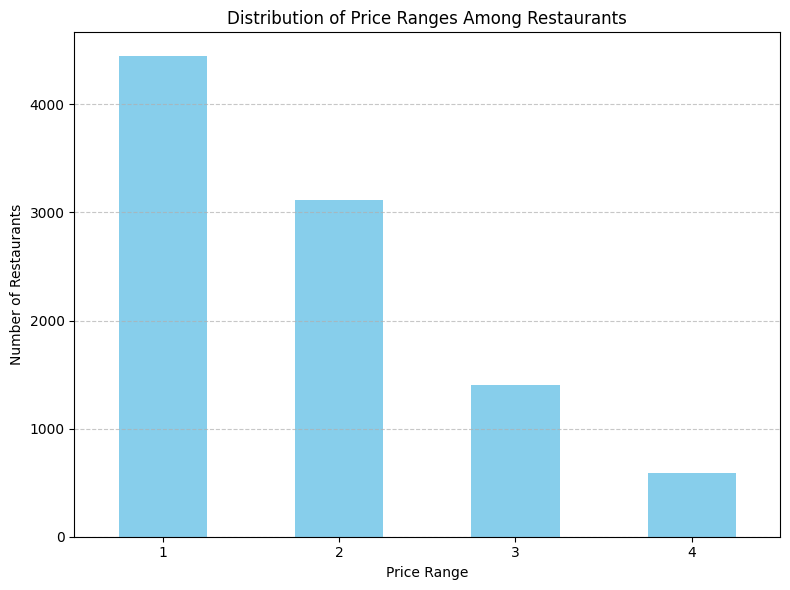

In [74]:
#Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants.

# Counting the occurrences of each price range
price_range_counts = df['Price range'].value_counts()

# Sorting the price ranges by index
price_range_counts_sorted = price_range_counts.sort_index()

# Plotting the bar chart
plt.figure(figsize=(8, 6))
price_range_counts_sorted.plot(kind='bar', color='skyblue')
plt.title('Distribution of Price Ranges Among Restaurants')
plt.xlabel('Price Range')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [75]:
#Calculate the percentage of restaurants in each price range category.

# Calculating the total number of restaurants
total_restaurants = len(df)

# Calculating the percentage of restaurants in each price range category
percentage_in_each_category = (price_range_counts / total_restaurants) * 100

print("Percentage of restaurants in each price range category:")
print(percentage_in_each_category)

Percentage of restaurants in each price range category:
Price range
1    46.529159
2    32.593446
3    14.741912
4     6.135483
Name: count, dtype: float64


In [76]:
#Task 4:- Online Delivery

#Determine the percentage of restaurants that offer online delivery.

#Compare the average ratings of restaurants with and without online delivery.

In [77]:
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [78]:
#Determine the percentage of restaurants that offer online delivery.

# Counting the occurrences of online delivery availability
online_delivery_counts = df['Has Online delivery'].value_counts()

# Calculating the total number of restaurants
total_restaurants = len(df)

# Calculating the percentage of restaurants that offer online delivery
percentage_with_online_delivery = (online_delivery_counts.get(1) / total_restaurants) * 100

print("Percentage of restaurants that offer online delivery:", percentage_with_online_delivery)

Percentage of restaurants that offer online delivery: 25.662234321013504


C:\Users\aksha\AppData\Local\Temp\ipykernel_10864\3728187722.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentage_with_online_delivery = (online_delivery_counts.get(1) / total_restaurants) * 100


In [79]:
df['Has Online delivery'].value_counts()

Has Online delivery
No     7100
Yes    2451
Name: count, dtype: int64

In [80]:
#Compare the average ratings of restaurants with and without online delivery.

# Grouping the data by whether online delivery is available or not and calculating the average rating for each group
average_rating_by_online_delivery = df.groupby('Has Online delivery')['Aggregate rating'].mean()
print("Average ratings of restaurants with and without online delivery:")
print(average_rating_by_online_delivery)

Average ratings of restaurants with and without online delivery:
Has Online delivery
No     2.465296
Yes    3.248837
Name: Aggregate rating, dtype: float64
